# Aula 6 | Tratamento de exceção

Nesta aula, vamos explorar conceitos de tratamento de exceção.

O tratamento de exceção em Python é uma maneira de lidar com erros que podem ocorrer durante a execução de um programa. 

Em vez de permitir que um programa falhe ao encontrar um erro, **o tratamento de exceção permite que o programa execute um bloco de código alternativo ou recupere-se do erro**.


## O que é uma exceção?
Uma exceção é um evento, que ocorre durante a execução do programa, que **interrompe o fluxo normal das instruções**.


> Por exemplo, tentar dividir um número por zero, acessar um arquivo que não existe, ou referenciar uma variável que não foi definida são situações que geram exceções.

Tratar uma exceção é importante para:

- **Robustez**: permite que seu programa lide com situações inesperadas, mantendo-o em execução ou fechando-o de maneira controlada.
- **Controle de fluxo**: oferece uma maneira de redirecionar o fluxo do programa em caso de erro, possibilitando a execução de código de recuperação ou limpeza.
- **Informações de erro:** exceções fornecem informações úteis sobre o que deu errado, ajudando na depuração do código.
- **Prevenção de falhas do programa**: ajuda a prevenir que falhas devido a erros menores levem à falha total do programa.

## Como funciona
O tratamento de exceção em Python é realizado por meio dos blocos:

- ```try```: bloco de código que pode gerar uma exceção.
- ```except```: define um bloco de código que será executado se uma exceção ocorrer no bloco try.
- ```else```: (opcional) se não ocorrer nenhuma exceção no bloco try, o bloco else é executado.
- ```finally```: (opcional) bloco de código que é sempre executado após os blocos try e except, independentemente de uma exceção ter ocorrido ou não.

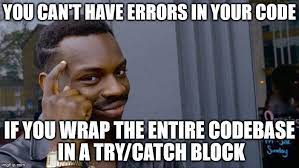

In [2]:
10 / 0

ZeroDivisionError: division by zero

In [3]:
lista = [1, 2, 3]
lista[10]

IndexError: list index out of range

In [6]:
try:
    r = 10/2
except ZeroDivisionError:
    print("Não é possível dividir por zero")
else:
    print("Divisão realizada com sucesso")
finally:
    print("Código finalizado!")

Divisão realizada com sucesso
Código finalizado!


In [7]:
try:
    r = 10/0
except ZeroDivisionError:
    print("Não é possível dividir por zero")
else:
    print("Divisão realizada com sucesso")
finally:
    print("Código finalizado!")

Não é possível dividir por zero
Código finalizado!


> Neste exemplo, tentamos dividir 10 por zero, o que gera uma ZeroDivisionError. O bloco except captura essa exceção e imprime uma mensagem. O bloco finally é executado ao final, independentemente do resultado.

### try/except

É usado para capturar e tratar exceções, permitindo que o programa continue sua execução ou falhe de forma controlada, em vez de terminar abruptamente com um erro.

In [12]:
valor = int(input("Digite um valor:"))
r = n / valor

ValueError: invalid literal for int() with base 10: 'abacate'

In [16]:
n = 10
try:
    valor = int(input("Digite um valor:"))
    r = n / valor
except ValueError:
    print("Valor precisa ser um inteiro! valor = 10")
except ZeroDivisionError:
    print("Não foi possível dividir por zero!")
else:
    print("A divisão ocorreu com sucesso")

A divisão ocorreu com sucesso


In [21]:
n = 10
try:
    valor = int(input("Digite um valor:"))
    r = n / valor
except (ValueError, ZeroDivisionError):
    print("Não foi possível realizar a divisão!")
else:
    print("A divisão ocorreu com sucesso")

A divisão ocorreu com sucesso


In [37]:
def somar(a: int, b: int) -> int:
    return a + b

try:
    soma = 0
    a = ""
    b = ""
    a = input("Digite o A:")
    b = input("Digite o B:")
    soma = somar(int(a), int(b))
except (ValueError):
    print(f"Não foi possível realizar a soma! {a}, {b}")
else:
    print(f"A soma ocorreu com sucesso, {a} + {b} o valor final foi: {soma}")
finally:
    print(f"Finally, {a} + {b}: {soma}")

A soma ocorreu com sucesso, 10 + 10 o valor final foi: 20
Finally, 10 + 10: 20


In [36]:
def concatenar(a: str, b: str) -> str:
    return a + b

try:
    a = input("Digite o A:")
    b = input("Digite o B:")
    concatenacao = concatenar(a, b)
except (ValueError):
    print(f"Não foi possível concatenar! {a}, {b}")
else:
    print(f"A soma ocorreu com sucesso, {a} + {b} o valor final foi: {concatenacao}!")
finally:
    print(f"Finally, {a} + {b}: {concatenacao}!")

A soma ocorreu com sucesso, qwe + qwe o valor final foi: qweqwe!
Finally, qwe + qwe: qweqwe!


In [60]:
try:
    n = 1
    n_float = float(n)
    if isinstance(n, float):
        print("É um float")
    else:
        print("Não é um float!")
except Exception:
    print("Não é um float!")

Não é um float!


Também podemos inserir um except genérico para todos os erros finalizando o código!

In [47]:
divisao = lambda a, b: a/b

lista = [1, 0, 4, "a"]

for l in lista:
    try:
        div = divisao(1, l)
    except ZeroDivisionError:
        print("Divisão por zero!")
    # except TypeError:
    #     print("Erro de tipo")
    except Exception as error:
        print("Erro", error)
        print("Erro", type(error).__name__)

Divisão por zero!
Erro unsupported operand type(s) for /: 'int' and 'str'
Erro TypeError


### try/except com else

O bloco else é executado se não ocorrer nenhuma exceção no bloco try.

### try/except com finally

O bloco finally é executado após a conclusão dos blocos try e except, independentemente de uma exceção ter sido lançada ou não. 

É útil para ações de limpeza que devem ser executadas sob quaisquer circunstâncias, como por exemplo quando precisamos fechar arquivos abertos ou conexões (com banco de dados).


In [68]:
from datetime import datetime, date
def string2data(data_string: str) -> date | None:
    """ola"""
    try:
        data_formatada = datetime.strptime(data_string, "%d/%m/%Y")
        print("Data formatada com sucesso!")
        return data_formatada.date()
    except ValueError:
        print("Data no formato de entrada errado!")
    except Exception as e:
        print("Erro:", type(e).__name__)
    finally:
        print("Tentativa de conversão foi concluida.")

print(string2data("14-08-2024"))
print(string2data(123))
print(string2data("14/08/2024"))

Data no formato de entrada errado!
Tentativa de conversão foi concluida.
None
Erro: TypeError
Tentativa de conversão foi concluida.
None
Data formatada com sucesso!
Tentativa de conversão foi concluida.
2024-08-14


In [69]:
print(string2data.__doc__)

ola


Resumindo:

```
try:
  Tente algum código
except:
  Caso ocorra um erro no bloco acima
else:
  Execute caso não tenha exceção
finally:
  Sempre execute esse código
```

## Raise exception

O conceito de raise em Python é usado para lançar uma exceção intencionalmente. Isso pode ser feito por vários motivos, como:

- Forçar a execução de um bloco except: quando você detecta uma condição que não pode ser tratada normalmente.
- Indicar que ocorreu um erro específico: para informar outros pedaços do código (ou quem chamou sua função) que algo inesperado aconteceu.
- Validar entradas: assegurar que os dados fornecidos a uma função estão dentro de um conjunto aceitável de parâmetros.


> Para Quê Ele Serve?
- Controle de Fluxo: Permite a você um controle mais granular sobre o fluxo do seu programa, especialmente em situações de erro.
- Comunicação: Facilita a comunicação entre diferentes partes do seu código, permitindo que funções chamadoras saibam que algo inesperado ocorreu.

Exemplo 1: Validando Formatos de Dados

Imagine que você está escrevendo uma função que processa dados de entrada para serem carregados em um banco de dados. Você quer garantir que todos os dados de entrada estejam no formato correto antes de continuar.

In [72]:
def validar_entradas(dados: dict):
    if not isinstance(dados, dict):
        raise ValueError("Os dados devem ser do formato dict!")
    print("Dados validados com sucesso")

try:
    validar_entradas(["isso é uma lista"])
except ValueError as e:
    print(e)

Os dados devem ser do formato dict!


In [73]:
validar_entradas(["lista teste"])

ValueError: Os dados devem ser do formato dict!

In [74]:

validar_entradas({"mensagem": "isso é uma lista"})

Dados validados com sucesso


In [76]:
try:
    validar_entradas({"mensagem": "isso é uma lista"})
except ValueError as e:
    print(e)

Dados validados com sucesso


Exemplo 2: Assegurando Valores Dentro de Um Intervalo

Em processos de ETL (Extract, Transform, Load), você pode precisar garantir que os valores numéricos estejam dentro de um determinado intervalo.

In [78]:
def extrair_valor(valor, inicio_intervalo = 0, fim_intervalo = 100):
    if not (inicio_intervalo <= valor <= fim_intervalo):
        print("pre raise")
        raise ValueError("O valor está fora do intervalo!")
        print("pos raise")
    print("É um intervalo válido!")
    return valor * 2 

try:
    print(extrair_valor(10))
except Exception as e:
    print(e)

try:
    print(extrair_valor(10000))
except Exception as e:
    print(e)

É um intervalo válido!
20
pre raise
O valor está fora do intervalo!


## Criando novas exceções

Podemos criar novas exceções personalizadas para lidar com situações específicas no código. 

Isso é feito através da definição de uma nova classe que **herda** _(aqui um conceito de POO)_ de uma classe de exceção existente, geralmente Exception. 

Criar suas próprias exceções personalizadas pode ajudar a tornar o seu código mais legível e permitir um tratamento de erro mais específico.

### Passos para criar exceções personalizadas

1. **Definir uma nova classe de exceção** <br>
crie uma nova classe que herde de Exception ou de qualquer outra classe de exceção apropriada.

2. **Inicializar a exceção** <br>
você pode definir um método __init__ para sua exceção personalizada se quiser passar mensagens de erro ou outros dados para ela.
3. **Usar raise para lançar a exceção** <br> 
quando você quiser lançar sua exceção personalizada, use a palavra-chave raise seguida de uma instância de sua exceção.

In [80]:
class DadosInvalidos(Exception):
    def __init__(self) -> None:
        super().__init__("Dados inválidos")

In [87]:
def validar_dados(idade: int) -> None:
    if idade < 0:
        raise DadosInvalidos
    
try:
    validar_dados(-5)
except DadosInvalidos as e:
    print(e)

try:
    validar_dados(5)
except DadosInvalidos as e:
    print(e)

Dados inválidos


**Por que criar exceções personalizadas?**

- Especificidade: exceções personalizadas permitem que você trate erros específicos de maneira mais direta e clara.
- Clareza: elas tornam seu código mais legível, pois o nome da exceção pode descrever o tipo de erro que ocorreu.
- Controle: oferecem maior controle sobre o tratamento de erros, permitindo diferentes ações de recuperação para diferentes tipos de erros.

## 🔎 Quais são os erros mais comuns e onde encontrar mais infos

A maneira mais direta é visitar a documentação oficial do Python na web. Para versões específicas do Python, você pode procurar pela documentação correspondente. Por exemplo, para Python 3.8, você acessaria https://docs.python.org/3.8/library/exceptions.html.

**Via linha de comando**: você pode usar o comando pydoc na linha de comando ou terminal. Por exemplo, ```pydoc exceptions``` pode fornecer informações úteis.

### Principais Tipos de Exceções
Aqui está uma breve visão geral de alguns dos principais tipos de exceções em Python:

- _Exception_: Classe base para todas as exceções embutidas, exceto as que são encerradas com o programa.
- _ArithmeticError_: Classe base para erros aritméticos como OverflowError, ZeroDivisionError, e FloatingPointError.
- _BufferError_: Lançada quando uma operação relacionada a um buffer não pode ser realizada.
- _LookupError_: Classe base para erros de busca como IndexError e KeyError.
- _MemoryError_: Lançada quando uma operação fica sem memória.
- _NameError_: Lançada quando uma variável local ou global não é encontrada.
- _ReferenceError_: Lançada quando uma referência fraca tenta acessar um objeto que já foi coletado pelo coletor de lixo.
- _RuntimeError_: Lançada quando um erro é detectado que não se enquadra em nenhuma das outras categorias.
- _SyntaxError_: Lançada quando um erro de sintaxe é encontrado.
- _SystemError_: Lançada quando o interpretador encontra um problema interno, mas a situação não parece ser tão séria para causar a parada do interpretador.
- _TypeError_: Lançada quando uma operação ou função é aplicada a um objeto de tipo inadequado.
- _ValueError_: Lançada quando uma operação ou função recebe um argumento com o tipo correto, mas valor inapropriado.